In [23]:
%matplotlib inline
import csv
import numpy as np
import urllib2
import pandas as pd
from subprocess import call
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [24]:
stationID = {}
with open('stationID.csv') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        stationID[row[0]] = row[1]

In [25]:
stationID

{'Boston': 'KBOS',
 'Chennai': 'VOMM',
 'Delhi': 'VIDP',
 'Detroit': 'KDET',
 'Edmonton': 'CYEG',
 'Fredericton': 'CYFC',
 'Halifax': 'CYHZ',
 'Iqaluit': 'CYFB',
 'Jaipur': 'VIJP',
 'Jasper': 'CWJW',
 'Juneau': 'KUNU',
 'London': 'CYXU',
 'Montreal': 'CYUL',
 'NewYork': 'KLGA',
 'NiagaraFalls': 'KIAG',
 'Ottawa': 'CYOW',
 'Regina': 'CYQR',
 'Saskatoon': 'CYXE',
 'Seattle': 'KSEA',
 'Toronto': 'CYTZ',
 'Vancouver': 'CYVR',
 'Victoria': 'CYYJ',
 'Whitehorse': 'CYXY',
 'Windsor': 'CYQG',
 'Winnipeg': 'CYWG',
 'YellowKnife': 'CYZF'}

In [26]:
for key in stationID:
    print key

Regina
Fredericton
Jaipur
NewYork
Whitehorse
Winnipeg
Vancouver
Chennai
Delhi
Victoria
Saskatoon
Toronto
Ottawa
NiagaraFalls
Detroit
Montreal
Iqaluit
YellowKnife
Boston
Edmonton
London
Jasper
Juneau
Halifax
Seattle
Windsor


In [27]:
initialYear = 2001
endyear = 2003 

In [28]:
from weatherUtils.fda import fda

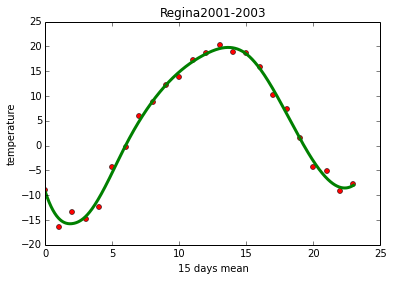

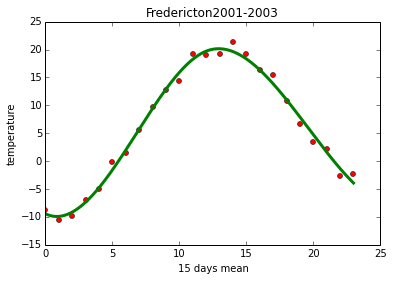

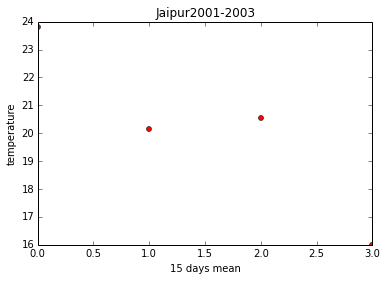

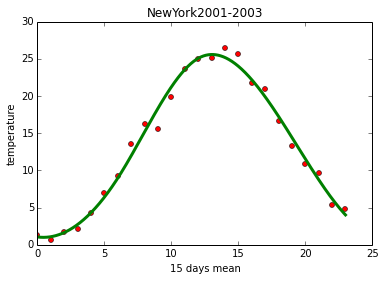

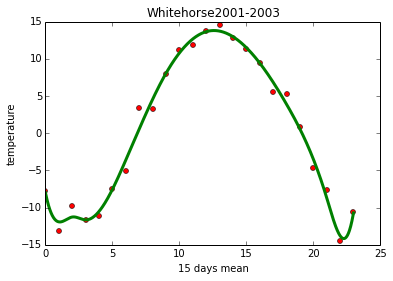

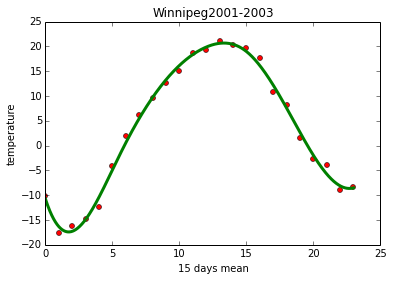

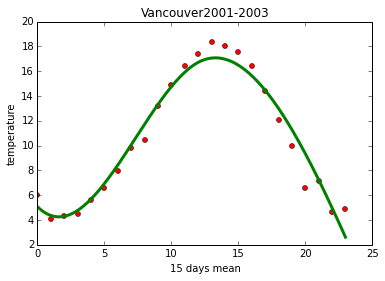

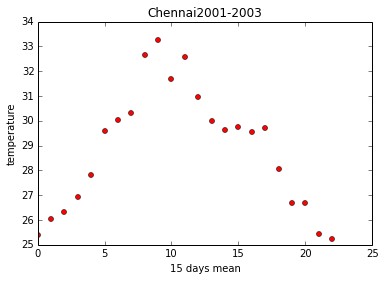

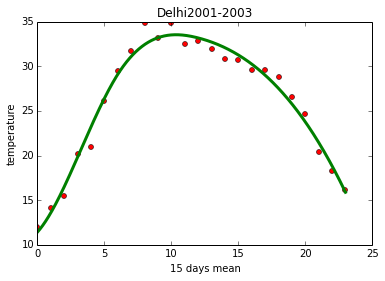

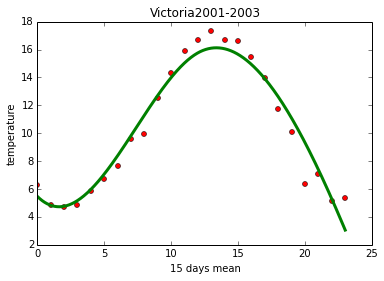

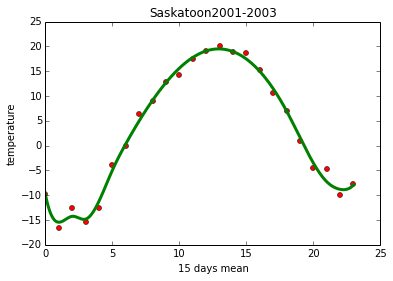

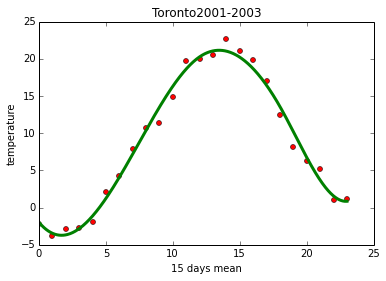

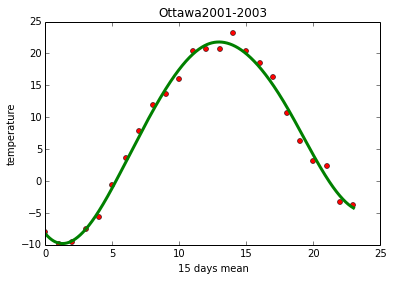

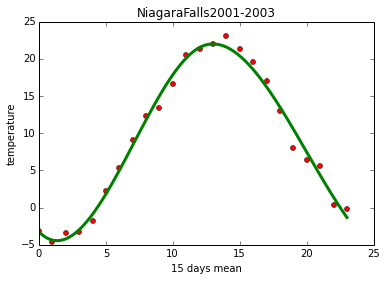

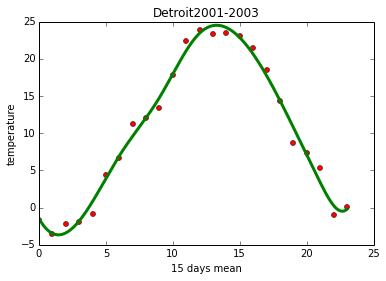

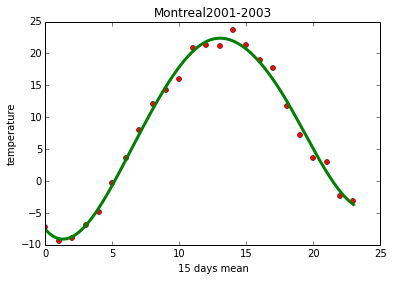

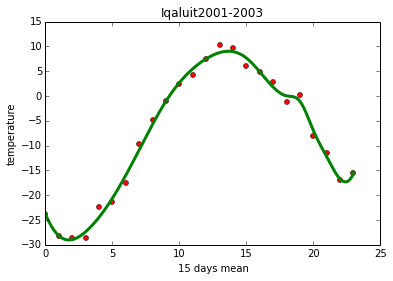

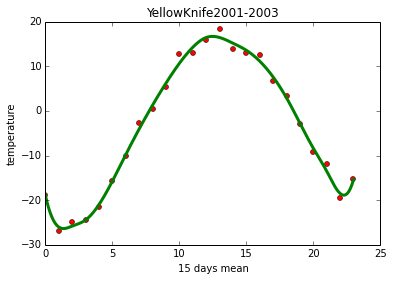

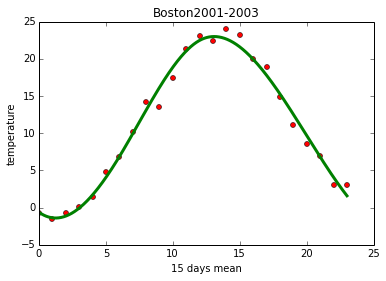

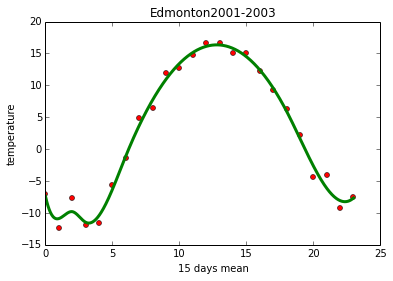

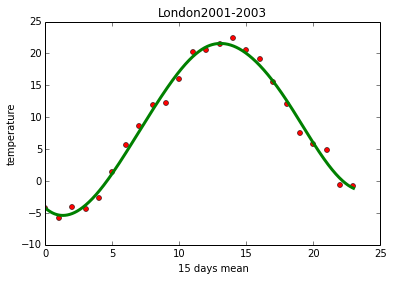

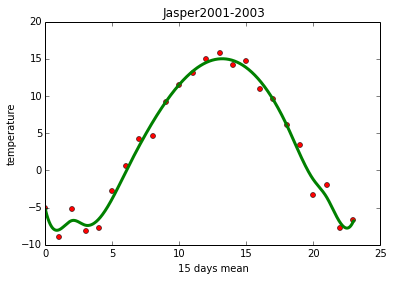

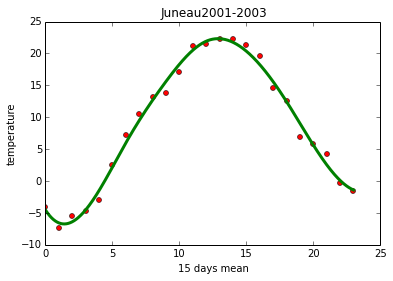

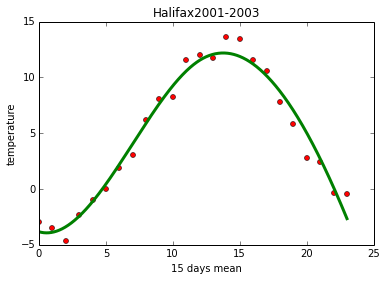

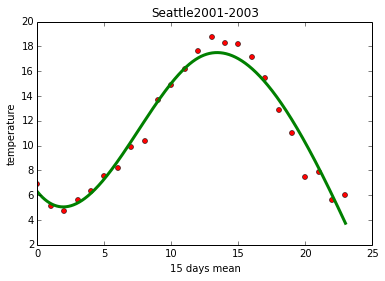

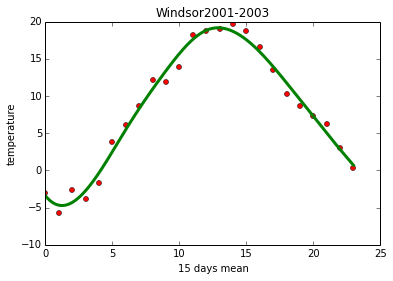

In [29]:
X = []
cityMap = {}
k = 0
for key in stationID:
    city = key
    code = stationID[key]
    curStationData = fda(initialYear,endyear,city,code)
    curX = curStationData.getFeatureVector()
    if curX is not None:
        X.append(curX)
        cityMap[k] = city
        k = k+1
    

In [30]:
X

[array([ -9.41025155,  -9.59693054,  -9.78016816,  -9.95999224,
        -10.13643064, -10.3095112 , -10.47926176, -10.64571017,
        -10.80888427, -10.9688119 , -11.12552092, -11.27903916,
        -11.42939447, -11.57661469, -11.72072767, -11.86176126,
        -11.99974329, -12.13470161, -12.26666408, -12.39565852,
        -12.52171278, -12.64485472, -12.76511217, -12.88251298,
        -12.99708499, -13.10885606, -13.21785401, -13.3241067 ,
        -13.42764197, -13.52848766, -13.62667163, -13.72222171,
        -13.81516575, -13.90553159, -13.99334708, -14.07864007,
        -14.16143839, -14.24176989, -14.31966242, -14.39514381,
        -14.46824193, -14.5389846 , -14.60739967, -14.673515  ,
        -14.73735841, -14.79895777, -14.8583409 , -14.91553566,
        -14.97056989, -15.02347144, -15.07426815, -15.12298786,
        -15.16965842, -15.21430767, -15.25696346, -15.29765363,
        -15.33640602, -15.37324849, -15.40820888, -15.44131502,
        -15.47259477, -15.50207596, -15.

In [31]:
X = pd.DataFrame(X)

In [32]:
X.shape

(24, 1000)

In [33]:
from sklearn.decomposition import PCA


In [34]:
pca = PCA()

In [35]:
pca.fit(X)
X = pca.transform(X)

In [36]:
X.shape

(24, 24)

In [37]:
X

array([[ -1.42429517e+02,  -5.96742896e+01,   2.75943861e+01,
          2.34979181e+00,  -1.88225054e+01,  -3.48582105e+00,
         -3.90560624e+00,   1.45579450e+00,   3.73090864e+00,
          2.51826914e+00,   1.43362053e+00,  -6.68455960e-02,
          2.42982162e-01,   5.39945623e-01,   2.60448069e-01,
          2.21939101e-01,  -2.28780657e-04,   1.73630207e-13,
          2.15626128e-14,  -3.25607596e-14,  -7.35522754e-15,
         -8.09768919e-15,  -1.54303653e-14,   3.01494940e-14],
       [ -2.44201087e+01,  -2.13484453e+01,  -2.33897822e+01,
          7.80633908e+00,   2.52322429e+00,   3.84051665e+00,
          8.27691083e+00,   1.74330452e+00,   1.90409270e+00,
          1.85017954e-01,  -3.74271029e-01,   7.89572138e-01,
          2.96616690e-01,   2.39950803e-01,   1.54242844e-01,
          9.92968211e-03,   2.11434490e-03,   1.21405544e-13,
         -9.62771529e-17,  -1.54581209e-14,   2.31412112e-15,
          1.95165065e-14,  -1.03758148e-14,  -5.16774123e-15],
      

In [38]:
from sklearn.cluster import KMeans

In [39]:
est = KMeans(n_clusters=2)

In [40]:
est.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [41]:
labels = est.labels_

In [42]:
city_class_map = {}
for num,label in enumerate(labels):
    city_class_map[cityMap[num]] = label

In [43]:
city_class_map

{'Boston': 1,
 'Delhi': 1,
 'Detroit': 1,
 'Edmonton': 0,
 'Fredericton': 1,
 'Halifax': 1,
 'Iqaluit': 0,
 'Jasper': 0,
 'Juneau': 1,
 'London': 1,
 'Montreal': 1,
 'NewYork': 1,
 'NiagaraFalls': 1,
 'Ottawa': 1,
 'Regina': 0,
 'Saskatoon': 0,
 'Seattle': 1,
 'Toronto': 1,
 'Vancouver': 1,
 'Victoria': 1,
 'Whitehorse': 0,
 'Windsor': 1,
 'Winnipeg': 0,
 'YellowKnife': 0}

In [44]:
[city for city in city_class_map if city_class_map[city] == 1]

['Fredericton',
 'NewYork',
 'Vancouver',
 'Delhi',
 'Victoria',
 'Toronto',
 'Ottawa',
 'Detroit',
 'NiagaraFalls',
 'Montreal',
 'Boston',
 'London',
 'Juneau',
 'Halifax',
 'Seattle',
 'Windsor']